## Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

I have downloaded this data from the github(https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects).

Importing numpy and pandas for data operations,matplotlib and seaborn for visualization process and sklearn libraries modules for data shaping and metrics evaluation

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing warnings to supress warnings when required
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the data from the folder and putting it to the dataframe
b=pd.read_csv('C:/Users/hp/Downloads/DSData-master/baseball.csv')
base=pd.DataFrame(b)

#getting the structure of the data
base.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


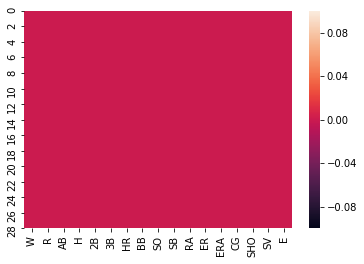

In [3]:
#checking for the presence of null values if any using heatmap
sns.heatmap(base.isnull())

In [4]:
base.isnull().sum()
#it is clear that datset has no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
base.shape

(30, 17)

In [6]:
#verifying for the datatype and other info
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Checking for the skewness of the data

In [7]:
base.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [8]:
#we get some skewed values more than 0.55,so we need to adjust
for index in base.skew().index:
    if base.skew().loc[index]>0.55:
        base[index]=np.sqrt(base[index])

Data Visualisation

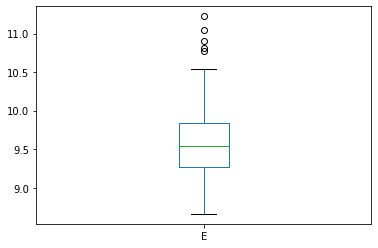

In [9]:
base['E'].plot.box()

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

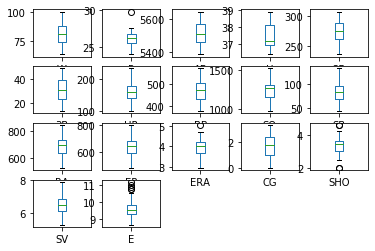

In [10]:
#plotting boxplot for all columns
base.plot(kind='box',subplots=True,layout=(4,5))

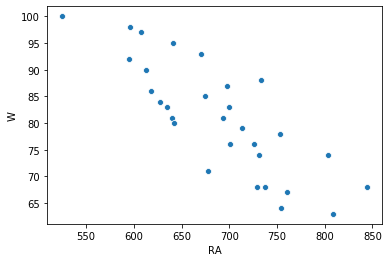

In [11]:
sns.scatterplot(x='RA',y='W',data=base)
#it shows the graph negatively

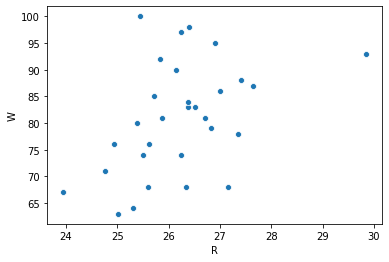

In [12]:
sns.scatterplot(x='R',y='W',data=base)
#this gives us some outliers in data

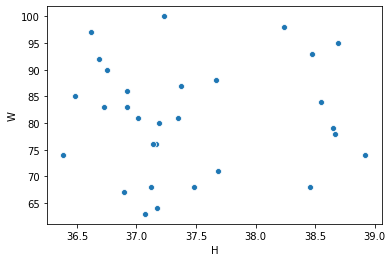

In [13]:
sns.scatterplot(x='H',y='W',data=base)

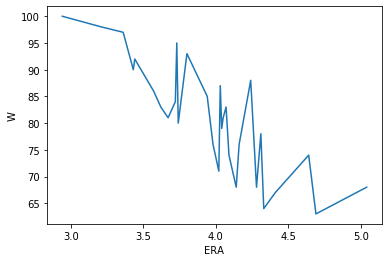

In [14]:
sns.lineplot(x='ERA',y='W',data=base)
#impact negatively

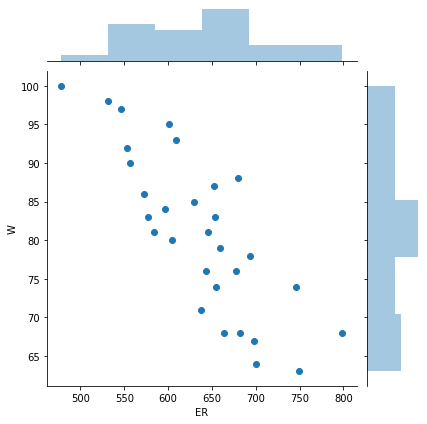

In [15]:
sns.jointplot(x='ER',y='W',data=base)

#it gives negative data,need to drop

In [16]:
#we get some of the features which impact negatively,so lets drop it
base.drop(['RA','ER','ERA'],axis=1,inplace=True)

Lets describe the data for statistical summary

In [17]:
base.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,26.211930,5516.266667,37.456345,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,1.660310,3.305667,6.536773,9.687994
std,10.453455,1.099235,70.467372,0.758091,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,0.857042,0.620815,0.590670,0.701800
min,63.000000,23.937418,5385.000000,36.386811,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,0.000000,2.000000,5.291503,8.660254
25%,74.000000,25.519565,5464.000000,36.918830,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,1.000000,3.000000,6.103175,9.273618
50%,81.000000,26.248809,5510.000000,37.181984,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,1.732051,3.464102,6.480281,9.539248
75%,87.750000,26.800127,5570.000000,38.097803,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,2.396134,3.605551,6.837323,9.836133
max,100.000000,29.849623,5649.000000,38.923001,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,3.316625,4.582576,7.874008,11.224972


This summary shows some outliers in the data which affects all the calculations including mean,standard deviation and min max diffrence

Applying zscore to remove outliers through the dataset

In [18]:
#importing zscore to manage outliers
from scipy.stats import zscore
z=np.abs(zscore(base))

#getting new dataset after applying zscore
base_new=base[(z<3).all(axis=1)]
base_new.shape

(29, 14)

In [19]:
#getting the new dataset after zscore as final dataset
base=base_new

Correlation of the columns or features among each other

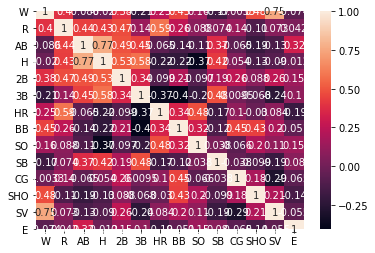

In [20]:
#getting correlation data view using heatmap
basec=base.corr()
sns.heatmap(basec,annot=True)

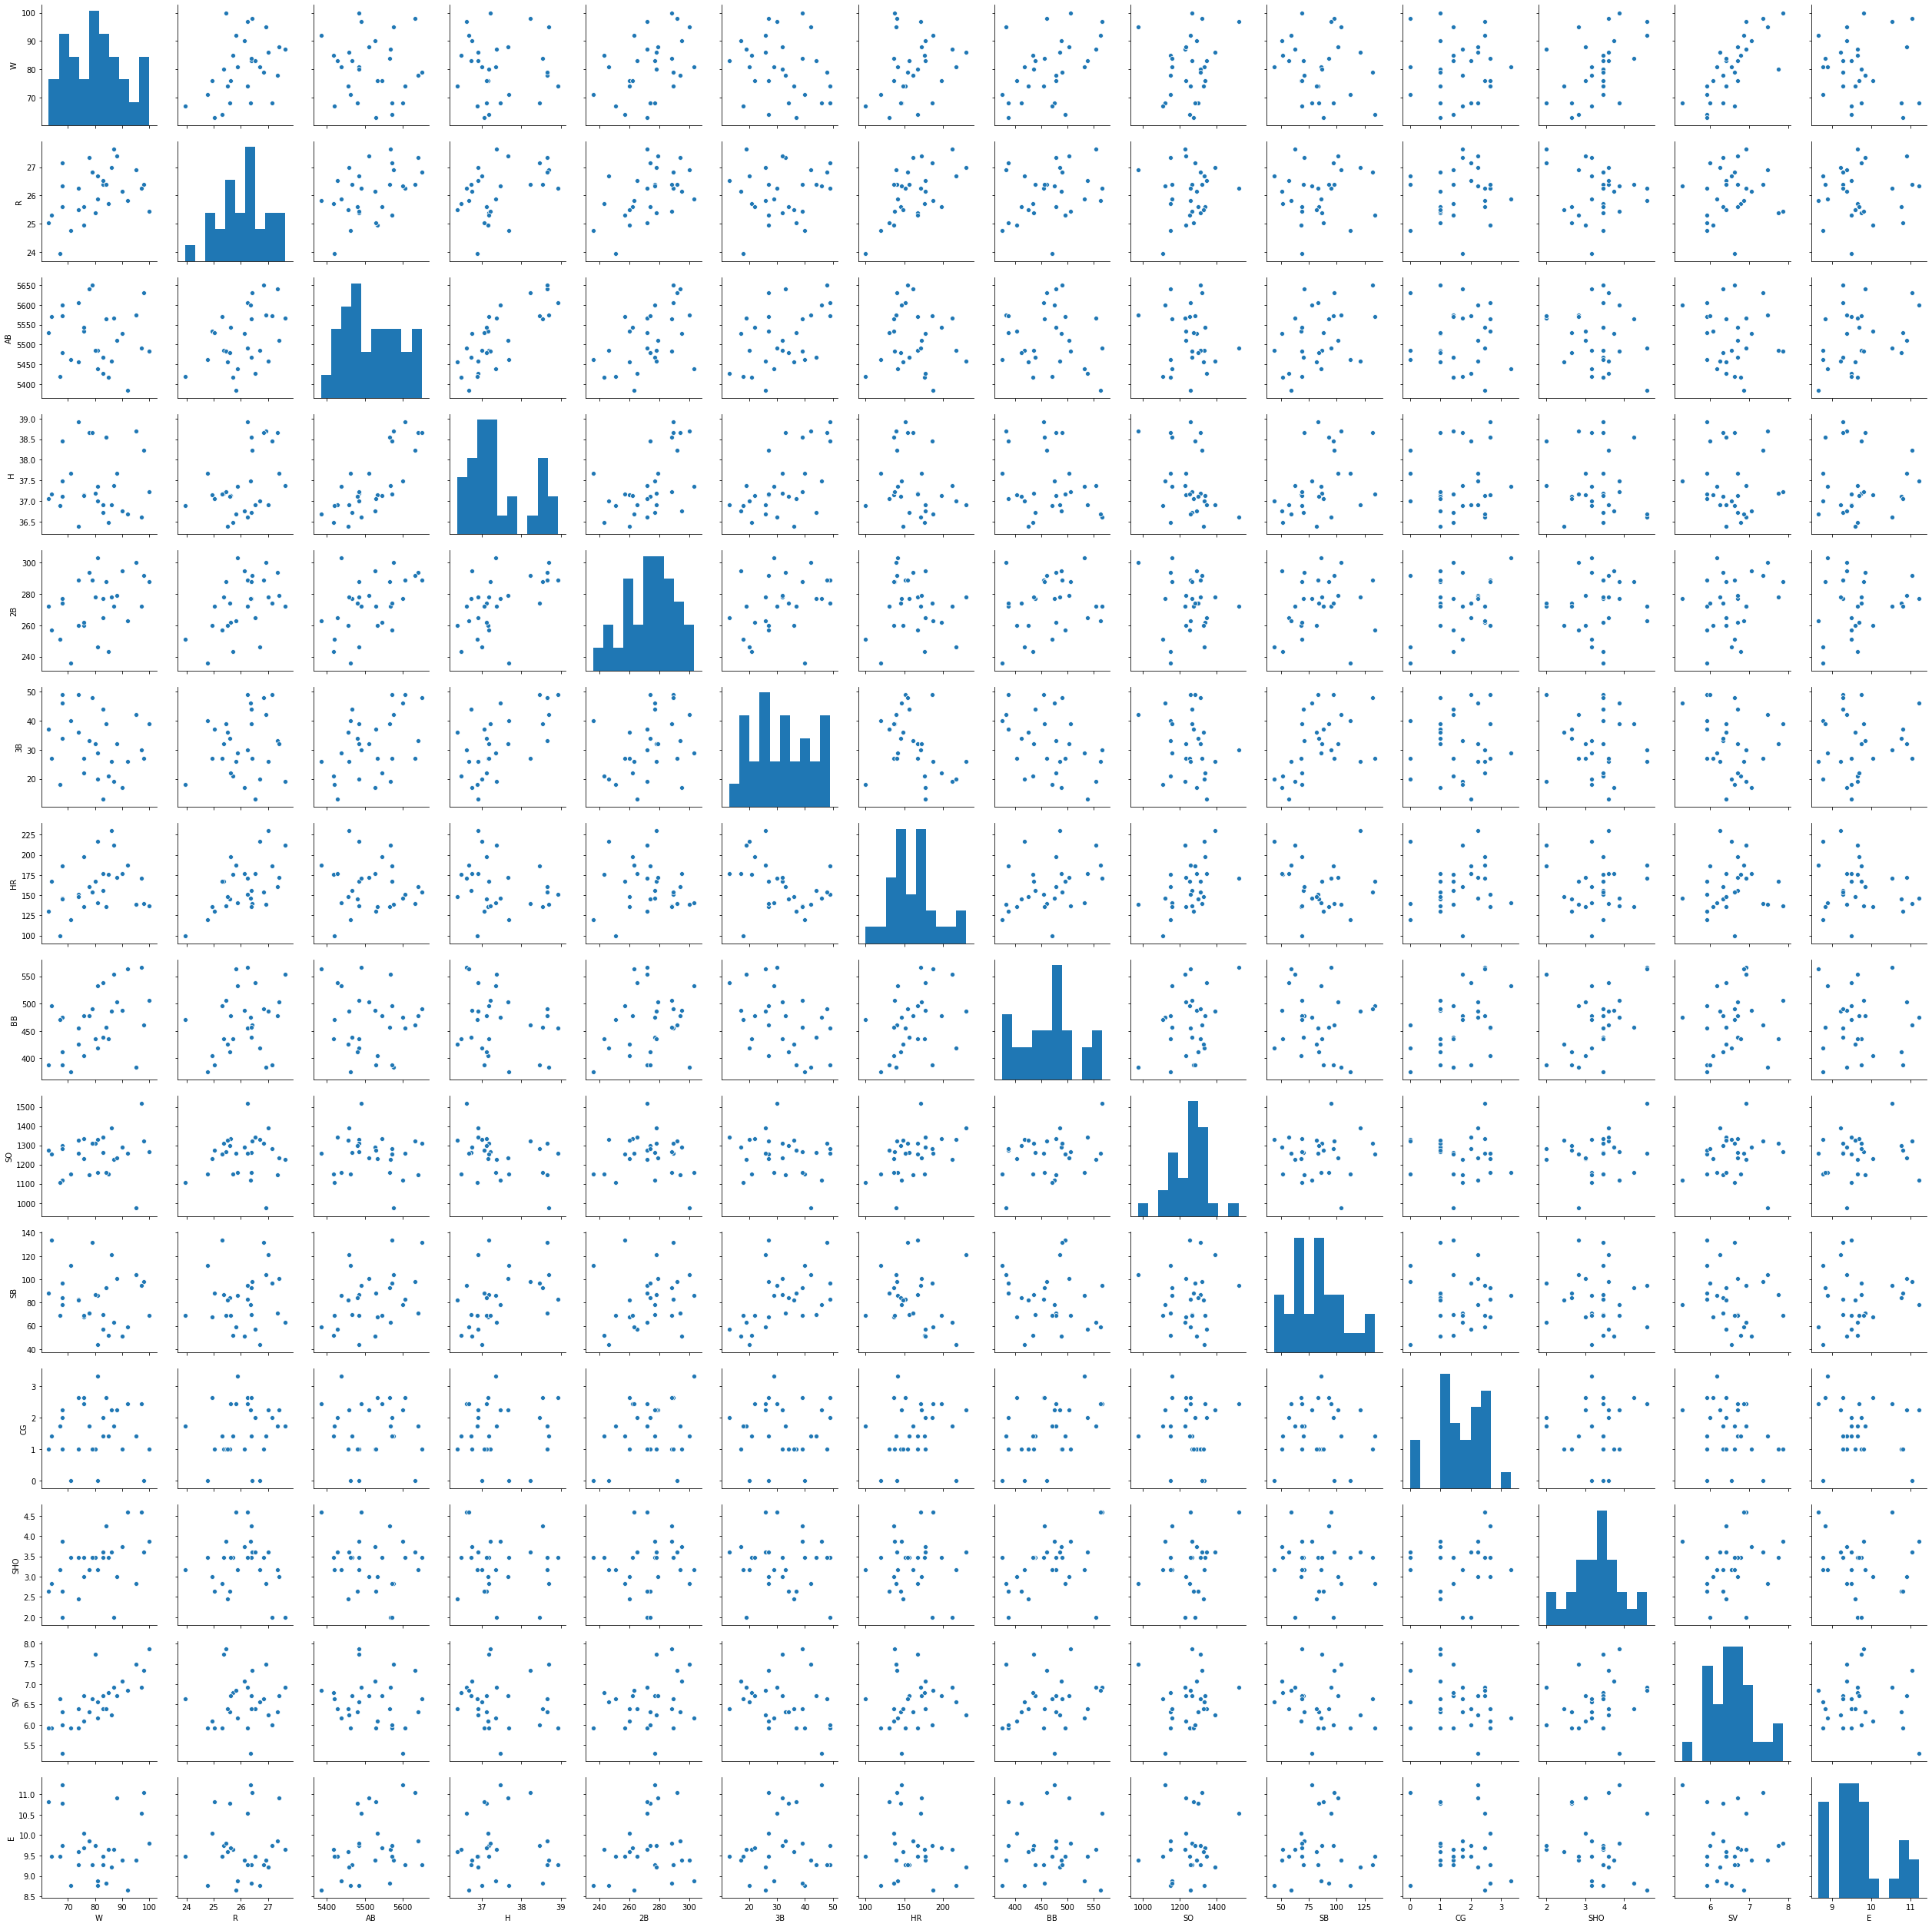

In [21]:
#plotting pairplot for dataset
sns.pairplot(base)

modelling the data for machine learning

In [22]:
#seperating input and target variables
mod_x=base.drop('W',axis=1)
y=base['W']

In [23]:
#scaling the input data using standard scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(mod_x)
#it gives data in the form of arrays
#putting back it to dataframe
x=pd.DataFrame(x,columns=mod_x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,0.956516,0.830084,1.731088,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.253549,-0.777436,1.602631,-0.454325
1,0.344168,-0.702831,-0.944305,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,-0.253549,0.247475,0.255621,-0.607619
2,-0.258090,-1.100253,-0.097707,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,2.020463,-0.239162,-0.689393,-1.158698
3,-1.336218,0.233951,-0.353870,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,1.218547,-0.500806,-0.831290,0.502274
4,0.189166,1.255894,2.047274,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.218547,0.247475,-1.120956,-0.607619
5,1.811114,0.716535,-0.061217,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126372,-2.113126,0.637942,-0.078546
6,0.717388,-0.447345,-0.556053,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,-1.944003,-0.239162,-0.006384,-1.320594
7,-0.826669,-0.447345,-0.317196,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.748671,0.247475,2.059075,0.068929
8,1.472025,1.752672,1.695839,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.126372,-0.239162,-0.411095,0.214859
9,1.535878,-0.078310,0.338457,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.728839,-0.500806,0.255621,1.730239


In [24]:
#creating function to determine random_state value
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [25]:
#creating the function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

In [26]:
#function for cross_val_score
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

Applying regression algorithm one by one to get the best score

Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

-0.3400033617085574 at 94


In [28]:
cross_val(lm)

[-0.46782699 -1.66651781  0.35860513  0.59860009  0.55858931]
-0.12371005529881944
0.862387911202999


Decision Tree Regressor

In [29]:
#getting the performance using decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

-1.249950874435056 at 62


In [30]:
cross_val(dtr)

[-0.71136364 -4.89473684  0.46549561  0.59180328  0.53714623]
-0.802331072966657
2.102439277322653


k-neighbors

In [31]:
##kneighbors algorithms
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#getting the best neighbors using gridsearchcv
parameters={'n_neighbors':range(1,20)}
grid=GridSearchCV(knr,parameters)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 4}

In [32]:
#determining random_state for k-neighbors
knr=KNeighborsRegressor(n_neighbors=4)
random(knr)

0.5721163293377873 at 56


In [33]:
cross_val(knr)

[-0.46953125 -1.53865132  0.29417608  0.40071721  0.46712854]
-0.16923214759672436
0.7628935426798042


Support vector machine

In [34]:
#lets go for support vector machine
from sklearn.svm import SVR
svm=SVR()

#getting the best kernel using gridsearchcv
parameters={"kernel":["linear", "rbf"],"C":[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(svm, parameters, cv=10)
grid.fit(x,y)
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [35]:
#random_state value using declared function above
svm=SVR(kernel='linear')
random(svm)

0.3830942295309462 at 44


In [36]:
cross_val(svm)

[-0.34362341 -2.63043496  0.35218992  0.3685183   0.72045405]
-0.3065792207327299
1.2121228107841098


From the above regression algorithms,K-neighbors has best r2_score of 0.57 at random state of 56,
so take K-neighbors as final algorithms for this dataset

In [37]:
#solving K-neighbors completly for metrics values and performance
knr=KNeighborsRegressor(n_neighbors=4)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=56)
model(knr)

mean_squared_error= 27.9875
mean_absolute_error= 4.45
r2_score= 0.6812720646851156
root_mean_squared_error= 5.290321351298048


In [38]:
#saving the model
from sklearn.externals import joblib
joblib.dump(knr,'knr_Baseball.pkl')

['knr_Baseball.pkl']

## Conclusion

After importing the data from the folder,I applied various operations in the data such as checking for the null values,skewed values and applied zscore to reduce the outliers.I have plot various features of data against the target value to get the insights.After shaping the data for the machine learning,I have used linear Regression,Decision tree regressor,K_neighbors Regressor and support vector regressor to get the best score value.Finally I got the best score from k_neighbors Regressor for this regression problem